# Importing necessary materials

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import cv2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
from emnist import list_datasets
from emnist import extract_training_samples 
from emnist import extract_test_samples
from tensorflow.keras.models import Sequential #importing seqential to make a sequencial model 
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D #importing other needed libraies from layers
list_datasets() #printing the list datasets in EMNIST to see which one to use

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

# Getting the trian and test data

In [2]:
images, labels = extract_training_samples('letters') #getting the training samples from the letters dataset 
test_images, test_labels = extract_test_samples('letters') #getting the testing samples from the letters dataset 

# Processing the data/ feature engineering

In [3]:
images = images.reshape(images.shape[0], 28, 28, 1) #reshaping the images in the training sample to the greyscale format 
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1) #reshaping the images in the testing samples to the grayscale format

In [4]:
images = images/255 #reducing the size of the datsets so they aren't greater than 0 or 1 
test_images = test_images/255 #reducing the size of the datsets so they aren't greater than 0 or 1 

# Making the CNN

In [5]:
input_shape = (28, 28, 1) #setting the input shape to be the same value as the image 
model = Sequential() #creating a model of type sequential
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #adding a Conv2D layer to the model input size to go over the image
model.add(MaxPooling2D(pool_size=(2, 2))) #adding max pooling to the model to differenciate light from dark colors
model.add(Flatten()) #flattening the model to make it a single array
model.add(Dense(128, activation=tf.nn.relu)) #adding a dense layer with 128 nuerons to the modle to get the next output layer using relu to prevent exponential growth
model.add(Dropout(0.2)) #adding a dropout to prevent overfitting
model.add(Dense(30,activation=tf.nn.softmax)) #adding another desnse layer with 30 nuerons using softmax to output a fit between 0 and 1 

2021-12-12 16:22:08.746631: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Compiling the CNN and running it for 10 epochs

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #compiling the model 
model.fit(images, labels, epochs=10) #fitting the model and running it 10 times

Epoch 1/10
3900/3900 [==============================] - 44s 11ms/step - loss: 0.6369 - accuracy: 0.8029
Epoch 2/10
3900/3900 [==============================] - 39s 10ms/step - loss: 0.3760 - accuracy: 0.8793
Epoch 3/10
3900/3900 [==============================] - 44s 11ms/step - loss: 0.3200 - accuracy: 0.8949
Epoch 4/10
3900/3900 [==============================] - 49s 13ms/step - loss: 0.2853 - accuracy: 0.9061
Epoch 5/10
3900/3900 [==============================] - 68s 18ms/step - loss: 0.2629 - accuracy: 0.9110
Epoch 6/10
3900/3900 [==============================] - 64s 16ms/step - loss: 0.2449 - accuracy: 0.9165
Epoch 7/10
3900/3900 [==============================] - 55s 14ms/step - loss: 0.2294 - accuracy: 0.9215
Epoch 8/10
3900/3900 [==============================] - 57s 15ms/step - loss: 0.2195 - accuracy: 0.9232
Epoch 9/10
3900/3900 [==============================] - 76s 19ms/step - loss: 0.2062 - accuracy: 0.9265
Epoch 10/10
3900/3900 [==============================] - 62s 16m

# Evaluating the model for accuracy

In [7]:
model.evaluate(test_images, test_labels) #evaulating the model to get its accuracy

650/650 [==============================] - 5s 6ms/step - loss: 0.2899 - accuracy: 0.9155


[0.28993430733680725, 0.9154807925224304]

# Loading and word counting the first phrase

In [8]:
root, directory, files = next(os.walk("/Users/katewalker/desktop/senior-year-semester1/machinelearning/JuypterLab/sample1"))
#walking through the files in the folder for the first phrase
files.sort()
files.remove('.DS_Store') #removing autogenerated file
print(files) #printing the files in the folder

['00.jpg', '01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']


added images to the phrase


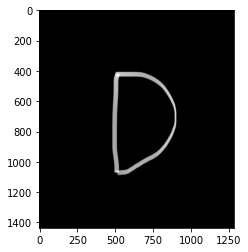

In [9]:
#processing the scanned in images
handwriting= [] #array to hold the phrase 
for i in range(len(files)):#walking through each file in the directory 
    img = cv2.imread("/Users/katewalker/desktop/senior-year-semester1/machinelearning/JuypterLab/sample1/"+files[i],cv2.IMREAD_GRAYSCALE)
    #setting the img to be the next file in the directory
    handwriting.append(img) #appending the image to the array 
    
print("added images to the phrase") #printing a message to know all files have been added 

plt.imshow(handwriting[10],cmap = 'gray') #showing the image at a specific index


added images to processed array


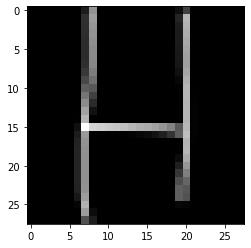

In [21]:
processed_handwriting = [] #array to hold the processed phrase

for image in handwriting: #looping through each image in the handwriting array
    points = cv2.findNonZero(image) #getting the width and the height
    val1, val2, width, height = cv2.boundingRect(points) #drawing an approximate rectagle around the part of the image containing the letter
    #cropping the image to fit the size of the rectangle
    if (width > 0 and height > 0):
        if width > height:
            val2 = val2 - (width-height)//2 
            image = image[val2:val2+width, val1:val1+width]
        else:
            val1 = val1 - (height-width)//2 
            image = image[val2:val2+height, val1:val1+height] 
    image = cv2.resize(image, (28,28), interpolation = cv2.INTER_AREA) #resize the image to be 28X28 and shrink the image down 
    processed_handwriting.append(image) #add the image to the array 

print("added images to processed array") #print statement to know loop is done

plt.imshow(processed_handwriting[0],cmap = 'gray') #showing image at a specified index

In [22]:
spaces = 0 #intializing spaces to 0 
words = 1 #intializing words to 1

for char in processed_handwriting: #looping throught each letter
    num_pixels = 0 
    for j in range(28): #looping through the pixels
        for k in range(28):
            num_pixels += char[j,k] #adding each pixel to the overall value
    if num_pixels < 20: #if the pixel value is less than 20 
        spaces = spaces + 1 #then the character is a space 
        words = words + 1 #increment word count
        
#printing the results
print("total spaces:")
print(spaces)
print("word count")
print(words)

total spaces:
1
word count
2


# Loading and word counting the second phrase

In [23]:
root, directory, files = next(os.walk("/Users/katewalker/desktop/senior-year-semester1/machinelearning/JuypterLab/sample2"))
#walking through the files in the folder for the first phrase
files.sort()
files.remove('.DS_Store') #removing autogenerated file
print(files) #printing the files in the folder

['00.jpg', '01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg']


added images to the phrase


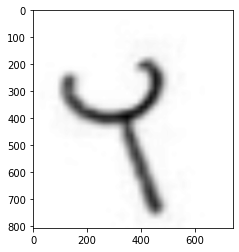

In [28]:
#processing the scanned in images
handwriting2= [] #array to hold the phrase 
for i in range(len(files)):#walking through each file in the directory 
    img = cv2.imread("/Users/katewalker/desktop/senior-year-semester1/machinelearning/JuypterLab/sample2/"+files[i],cv2.IMREAD_GRAYSCALE)
    #setting the img to be the next file in the directory
    handwriting2.append(img) #appending the image to the array 
    
print("added images to the phrase") #printing a message to know all files have been added 

plt.imshow(handwriting2[4],cmap = 'gray') #showing the image at a specific index

added images to processed array


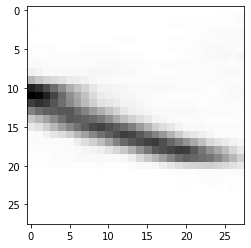

In [30]:
processed_handwriting2 = [] #array to hold the processed phrase

for image2 in handwriting2: #looping through each image in the handwritten phrase array
    points = cv2.findNonZero(image2) #getting the width and the height
    val1, val2, width, height = cv2.boundingRect(points) #drawing an approximate rectagle around the part of the image containing the letter
    #cropping the image to fit the size of the rectangle
    if (width > 0 and height > 0):
        if width > height:
            val2 = val2 - (width-height)//2 
            image2 = image2[val2:val2+width, val1:val1+width]
        else:
            val1 = val1 - (height-width)//2 
            image2 = image2[val2:val2+height, val1:val1+height] 
    image2 = cv2.resize(image2, (28,28), interpolation = cv2.INTER_AREA) #resize the image to be 28X28 and shrink the image down 
    processed_handwriting2.append(image2) #add the image to the array 

print("added images to processed array") #print statement to know loop is done

plt.imshow(processed_handwriting2[0],cmap = 'gray') #showing image at a specified index

In [31]:
spaces2 = 0
words2 = 1

for char2 in processed_handwriting2: 
    num_pixels2 = 0 
    for j in range(28):
        for k in range(28):
            num_pixels2 += char2[j,k]
    if num_pixels2 < 20: 
        spaces2 = spaces2 + 1 
        words2 = words2 + 1 
#printing the results
print("total spaces:")
print(spaces2)
print("word count:")
print(words2)

total spaces:
4
word count:
5
